# Data Pre-Processing || Handling Outliers
🦊 `Notebook by` [Md.Samiul Alim](https://github.com/sami0055)

😋  `Machine Learning Source Codes` [GitHub](https://github.com/sami0055/Machine-Learning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data={
    'age':[25,30,22,35,28],
    'gender':['Male','Female','Male','Female','Male'],
    'height' : [1.65, 1.55, 1.7, 1.68, 1.75],
    'weight' : [70,55,85,60,75]
}
df=pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      int64  
 1   gender  5 non-null      object 
 2   height  5 non-null      float64
 3   weight  5 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


In [5]:
df

,age,gender,height,weight
0,25,Male,1.65,70
1,30,Female,1.55,55
2,22,Male,1.70,85
3,35,Female,1.68,60
4,28,Male,1.75,75


## Feature Engineering

In [9]:
#Calculate BMI
#BMI= weight/height**2
#List for storing BMI
bmi=[]
for i, row in df.iterrows():
    weight=float(row['weight'])
    height=float(row['height'])
    bmi_res=weight/(height**2)
    print(weight,height,bmi_res)
    bmi.append(round(bmi_res,2))

70.0 1.65 25.71166207529844
55.0 1.55 22.892819979188342
85.0 1.7 29.411764705882355
60.0 1.68 21.258503401360546
75.0 1.75 24.489795918367346


In [10]:
bmi

[25.71, 22.89, 29.41, 21.26, 24.49]

In [11]:
# Create and insert a new column to the df
df['BMI']=bmi

In [12]:
df

,age,gender,height,weight,BMI
0,25,Male,1.65,70,25.71
1,30,Female,1.55,55,22.89
2,22,Male,1.70,85,29.41
3,35,Female,1.68,60,21.26
4,28,Male,1.75,75,24.49


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      int64  
 1   gender  5 non-null      object 
 2   height  5 non-null      float64
 3   weight  5 non-null      int64  
 4   BMI     5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 332.0+ bytes


## Feature Selection

C:\Users\SAMI\AppData\Local\Temp\ipykernel_5708\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

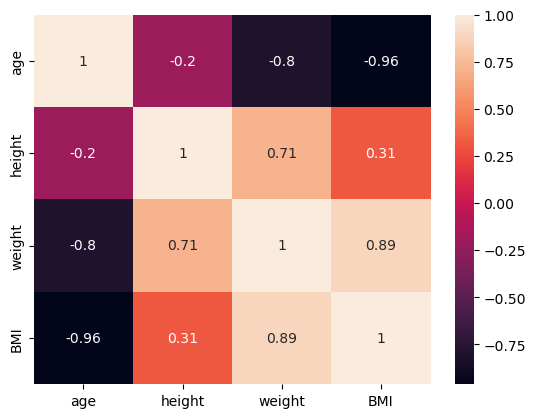

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# If you are using jupytre notebook then follow this code
# This code has included the instruction for excluding the string type columns from the matrix 


<Axes: >

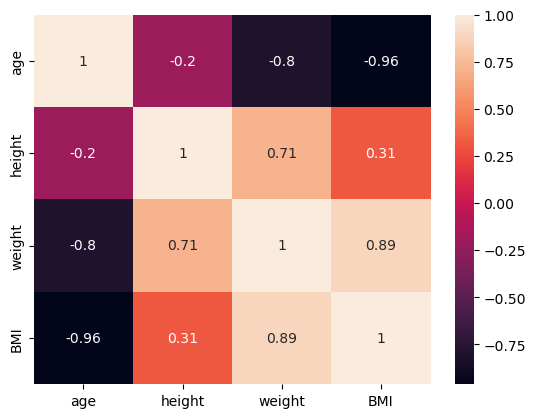

In [18]:
numeric_df=df.select_dtypes(include=['float64','int64'])
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix,annot=True)

<Axes: >

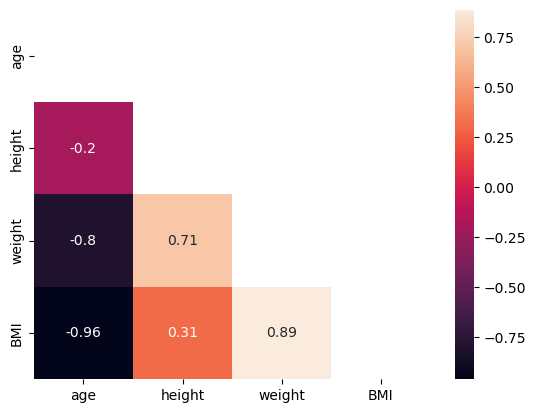

In [19]:
numeric_df=df.select_dtypes(include=['float64','int64'])
corr_matrix=numeric_df.corr()
mask=np.triu(corr_matrix)
sns.heatmap(corr_matrix,annot=True,mask=mask)

In [20]:
#Drop the weight
df=df.drop(columns=['weight'])
df

,age,gender,height,BMI
0,25,Male,1.65,25.71
1,30,Female,1.55,22.89
2,22,Male,1.70,29.41
3,35,Female,1.68,21.26
4,28,Male,1.75,24.49


## Thank you